# Predicting Life Expectancy from Health and Economic Indicators

## Context 
The life expectancy of a country is a crucial indicator of its healthcare quality, influenced by various factors such as HIV prevalence, healthcare funding, and other less tangible elements. Understanding these determinants is essential for a nation to formulate policies and strategies aimed at enhancing its citizens' quality of life. Moreover, this knowledge is beneficial for businesses impacted by life expectancy trends, such as life insurance providers, as it enables them to adapt and optimize their operations in response to these dynamics. Therefore, developing a model that not only predicts a nation's life expectancy with accuracy but also illuminates the contributing factors and their impacts is invaluable for healthcare, political, and economic planning at a national level but also has potential applications at a more localized scale, such as in neighborhood-level planning and analysis.

## Predicting Life Expectancy: Its Value Across Sectors

###  **Business Implications**
- **Insurance Sector**: Accurate life expectancy predictions could be invaluable in the insurance world, especially for life insurance and annuities. Premiums are often set to offset the information asymmetry that insurance companies grapple with. These predictions may help in reducing this asymmetric information, setting premiums accordingly, and determining financial reserves.
- **Pension Funds**: Additionally, understanding life expectancy trends  in a region aids pension funds in balancing their liabilities and ensuring they're financially prepared for long-term payouts.
- **Targeted Products and Services**: Companies can develop and market products that cater to various age groups, influenced by life expectancy trends. This is particularly relevant in retirement planning and healthcare products.

###  **Economic Impact**
- **Policy and Governance**: Governments can utilize life expectancy forecasts for critical policy-making decisions, such as setting retirement ages and planning for social security and healthcare funding.
- **Labor Market Dynamics**: These predictions can help in shaping the workforce, retirement policies, and skill development programs, especially for older workers.
- **Investment Strategies**: Life expectancy trends can guide investors and financial advisors, particularly in sectors like healthcare and retirement living.

###  **Healthcare Significance**
- **Public Health Strategy**: Life expectancy forecasts can shape public health initiatives, focusing on disease prevention, health education, and lifestyle modifications. The insigths gleaned from the model can illuminate the most important factors that affect the quality of life in a nation. With these insights, governments can determine how to optimally allocate resources to the healthcare sector to improve their nations' healthcare quality. Healthcare providers and policymakers can optimize resource distribution, targeting areas that significantly impact life expectancy.
- **Research and Development Drive**: These trends inform where R&D efforts should be concentrated, particularly in pharmaceuticals and medical technology focusing on longevity-impacting conditions.

## Hypothesis

The life expectancy of a population is significantly influenced by a combination of healthcare-related factors (such as HIV prevalence and healthcare funding) and socio-economic conditions. This interplay of factors not only affects the quality of healthcare but also has wide-ranging implications for businesses (especially in the insurance and pension sectors), economic policies, and public health strategies. By accurately modeling and predicting life expectancy, stakeholders across these sectors can make more informed decisions, leading to optimized business strategies, effective policy formulation, and targeted public health initiatives.

## Data Description for "Life Expectancy (WHO)" Dataset

**Source:** [Life Expectancy (WHO) - Kaggle](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/data)

This dataset aggregates various health factors and indicators across countries, compiled by the World Health Organization (WHO). It encompasses a wide array of health-related variables, offering insights into different aspects influencing the life expectancy in various countries.

### Data Dictionary:

1. **Country**: Name of the country.
2. **Year**: Calendar year of the data entry.
3. **Status**: Developed or Developing status of the country.
4. **Life Expectancy**: Life Expectancy in age.
5. **Adult Mortality**: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population).
6. **Infant Deaths**: Number of Infant Deaths per 1000 population.
7. **Alcohol**: Alcohol, recorded per capita (15+) consumption (in liters of pure alcohol).
8. **Percentage Expenditure**: Expenditure on health as a percentage of Gross Domestic Product (GDP).
9. **Hepatitis B**: Hepatitis B (HepB) immunization coverage among 1-year-olds (%).
10. **Measles**: Number of reported cases per 1000 population.
11. **BMI**: Average Body Mass Index of the entire population.
12. **Under-Five Deaths**: Number of under-five deaths per 1000 population.
13. **Polio**: Polio (Pol3) immunization coverage among 1-year-olds (%).
14. **Total Expenditure**: General government expenditure on health as a percentage of total government expenditure (%).
15. **Diphtheria**: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%).
16. **HIV/AIDS**: Deaths per 1000 live births HIV/AIDS (0-4 years).
17. **GDP**: Gross Domestic Product per capita (in USD).
18. **Population**: Population of the country.
19. **Thinness 1-19 years**: Prevalence of thinness among children and adolescents for Age 10 to 19 (%).
20. **Thinness 5-9 years**: Prevalence of thinness among children for Age 5 to 9(%).
21. **Income Composition of Resources**: Human Development Index in terms of income composition of resources (index ranging from 0 to 1).
22. **Schooling**: Number of years of Schooling(years).

This dataset provides a comprehensive view of the factors affecting life expectancy and can be used for in-depth analysis and modeling to understand the relationships between these variables and life expectancy.




## Model
Given the goal of this project, parsimony is key. Therefore, I have prioritized simplicity and explainability in selecting the best model. This approach is vital because the aim of the project is not only to predict life expectancy but, more importantly, to understand the factors at play and their influence on life expectancy. 

### Data Preprocessing
Before model building, several steps were conducted to prepare the dataset for modeling:
- The dataset was divided into training and test sets. All model training was done on the training set, while the test set was used solely for evaluation. The original dataframe was also retained for Exploratory Data Analysis (EDA).
- Rows with null values in the target variable were dropped.
- Missing values were filled using KNN imputer, chosen because most missing values carry information distinct to their nature; simply filling them with the median would be counterintuitive.
- The categorical variable 'status' was one-hot encoded.
- 'Year' and 'Country' were dropped from the dataset because, given the use case, we are not interested in temporal patterns. Additionally, using 'Country' as a feature may lead to overly optimistic results due to information leakage, as we are trying to predict a nation's life expectancy based on specific factors.
- All preprocessing steps were first explored individually to assess their impact. They were then incorporated into a pipeline with the model to avoid information leakage during training and ensure consistency with the test set.

### Model Approach
A decision tree model was selected. A base model was initially created with a maximum depth of 5. Subsequently, a grid search was conducted to determine the optimal combination of maximum depth, minimum sample leaf, and minimum sample split. The hyperparameter grid was tailored to avoid a complex decision tree—meaning a relatively low maximum tree depth and relatively high maximum sample split and leaf.

### Model Evaluation 
The root mean squared error (RMSE) was the metric I sought to minimize in evaluating and tuning the model. RMSE was chosen because it penalizes larger deviations from actual values. The model's performance on the training set was compared to its average RMSE over 10-fold cross-validation to gauge its generalization capability. Further assessment of generalization was conducted using the test set, which was not involved in the training process.

## Results
With RMSEs of 2.68 and 2.85 on the training and test sets respectively, the model demonstrates a good balance between bias and variance. The similar RMSE values on unseen data indicate model generalization. After establishing the model's reliability, key insights include:
- The most important factors affecting life expectancy include the nation's development status, percentage of Diphtheria immunization among one-year-olds, and prevalence of thinness amongst 5-9 year-olds. 
- Developed countries tend to have higher life expectancy, countries with low Diphtheria immunization rates tend to have lower life expectancy, and countries with a high prevalence of thinness among children tend to have lower life expectancy.

## Explainability of Results
As mentioned earlier, a simple algorithm was chosen to enhance explainability. More complex, 'black box' algorithms such as ensemble trees might offer better performance but are harder to explain. To further facilitate the model's explainability, the decision rules of the model were programmatically extracted, showing the growth and splits at each node of the decision tree. Additionally, the top tree features were visually displayed to show how the tree splits at each node, the number of samples at each node, the squared error at each node, and the average life expectancy of the samples in each node. Examining these values, along with the decision rules, enhances the explainability of the model.


## Threats to validity 

## Lessons learned 

## Next Steps

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.tree import _tree


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.ensemble import IsolationForest
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


from sklearn.metrics import mean_squared_error, r2_score



In [290]:
df=pd.read_csv('Life Expectancy Data.csv')

In [291]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [292]:
train_set, test_set = shuffle_and_split_data(df, 0.2)
len(train_set)

2351

In [293]:
len(test_set)

587

In [294]:
train_set.drop(['Country','Year'],axis=1,inplace=True)
test_set.drop(['Country','Year'],axis=1,inplace=True)

/var/folders/rj/g3r71fsx2vnbbbjb9v368gr00000gp/T/ipykernel_7276/4229173078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set.drop(['Country','Year'],axis=1,inplace=True)
/var/folders/rj/g3r71fsx2vnbbbjb9v368gr00000gp/T/ipykernel_7276/4229173078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set.drop(['Country','Year'],axis=1,inplace=True)


In [295]:
df.shape

(2938, 22)

In [296]:
df.sample(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2326,Singapore,2002,Developed,79.0,74.0,0,2.16,142.098982,95.0,211,...,94.0,2.84,94.0,0.1,2216.832790,NaN,2.1,2.0,0.818,12.6
512,Central African Republic,2015,Developing,52.5,397.0,15,NaN,0.000000,47.0,150,...,47.0,NaN,47.0,4.4,348.381417,45461.0,8.2,8.2,0.347,7.1
251,Belgium,2004,Developed,78.8,91.0,1,12.05,5160.508378,64.0,61,...,96.0,9.32,95.0,0.1,35589.712950,1421137.0,0.8,0.8,0.880,18.8
699,Czechia,2005,Developed,75.9,114.0,0,13.19,0.000000,99.0,0,...,96.0,6.93,97.0,0.1,NaN,NaN,2.1,2.1,NaN,NaN
1977,Papua New Guinea,2013,Developing,62.4,281.0,10,0.01,25.708817,73.0,12,...,8.0,4.78,79.0,0.8,229.953640,7592865.0,1.3,1.3,0.506,10.0
2484,Suriname,2004,Developing,68.3,214.0,0,4.55,4.232577,NaN,0,...,84.0,6.88,85.0,0.9,36.487730,49363.0,3.5,3.5,0.000,11.1
1615,Maldives,2002,Developing,71.8,124.0,0,1.95,4.299053,98.0,926,...,98.0,5.78,98.0,0.1,32.372390,297.0,14.6,14.7,0.597,12.0
642,Croatia,2014,Developed,77.8,97.0,0,12.14,1884.098811,95.0,0,...,95.0,7.80,95.0,0.1,13467.468270,4238389.0,1.5,1.5,0.820,15.1
1655,Mauritania,2011,Developing,62.2,212.0,8,0.01,79.276585,75.0,234,...,73.0,2.87,75.0,1.2,1393.261593,3717672.0,8.5,8.3,0.487,7.7
50,Angola,2013,Developing,51.1,355.0,69,8.10,35.958573,77.0,8523,...,67.0,4.26,77.0,2.3,484.616884,2599834.0,8.6,8.5,0.523,11.4


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [298]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [299]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [300]:
df[df['Hepatitis B'].isna()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
44,Algeria,2003,Developing,71.7,146.0,20,0.34,25.018523,NaN,15374,...,87.0,3.60,87.0,0.1,294.335560,3243514.0,6.3,6.1,0.663,11.5
45,Algeria,2002,Developing,71.6,145.0,20,0.36,148.511984,NaN,5862,...,86.0,3.73,86.0,0.1,1774.336730,3199546.0,6.3,6.2,0.653,11.1
46,Algeria,2001,Developing,71.4,145.0,20,0.23,147.986071,NaN,2686,...,89.0,3.84,89.0,0.1,1732.857979,31592153.0,6.4,6.3,0.644,10.9
47,Algeria,2000,Developing,71.3,145.0,21,0.25,154.455944,NaN,0,...,86.0,3.49,86.0,0.1,1757.177970,3118366.0,6.5,6.4,0.636,10.7
57,Angola,2006,Developing,47.7,381.0,90,5.84,25.086888,NaN,765,...,36.0,4.54,34.0,2.5,262.415149,2262399.0,9.8,9.7,0.439,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,Zambia,2004,Developing,47.9,578.0,36,2.46,8.369852,NaN,35,...,84.0,7.33,83.0,17.6,53.277222,11731746.0,7.2,7.1,0.456,10.5
2918,Zambia,2003,Developing,46.4,64.0,39,2.33,65.789974,NaN,881,...,85.0,8.18,83.0,18.2,429.158343,11421984.0,7.3,7.2,0.443,10.2
2919,Zambia,2002,Developing,45.5,69.0,41,2.44,54.043480,NaN,25036,...,85.0,6.93,84.0,18.4,377.135244,111249.0,7.4,7.3,0.433,10.0
2920,Zambia,2001,Developing,44.6,611.0,43,2.61,46.830275,NaN,16997,...,86.0,6.56,85.0,18.6,378.273624,1824125.0,7.4,7.4,0.424,9.8


In [301]:
df[df['Population'].isna()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.95410,NaN,3.3,3.3,0.784,13.9
65,Antigua and Barbuda,2014,Developing,76.2,131.0,0,8.56,2422.999774,99.0,0,...,96.0,5.54,99.0,0.2,12888.29667,NaN,3.3,3.3,0.782,13.9
66,Antigua and Barbuda,2013,Developing,76.1,133.0,0,8.58,1991.430372,99.0,0,...,98.0,5.33,99.0,0.2,12224.86416,NaN,3.3,3.3,0.781,13.9
67,Antigua and Barbuda,2012,Developing,75.9,134.0,0,8.18,2156.229842,98.0,0,...,97.0,5.39,98.0,0.2,12565.44197,NaN,3.3,3.3,0.778,13.8
68,Antigua and Barbuda,2011,Developing,75.7,136.0,0,7.84,1810.875316,99.0,0,...,99.0,5.65,99.0,0.1,11929.34991,NaN,3.3,3.3,0.782,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2901,Yemen,2004,Developing,62.2,247.0,42,0.06,0.000000,43.0,12708,...,72.0,4.90,72.0,0.1,NaN,NaN,13.9,13.9,0.464,8.4
2902,Yemen,2003,Developing,61.9,249.0,43,0.04,0.000000,38.0,8536,...,61.0,5.00,61.0,0.1,NaN,NaN,14.0,13.9,0.457,8.2
2903,Yemen,2002,Developing,61.5,25.0,45,0.07,0.000000,31.0,890,...,64.0,4.22,65.0,0.1,NaN,NaN,14.0,14.0,0.450,8.0
2904,Yemen,2001,Developing,61.1,251.0,46,0.08,0.000000,19.0,485,...,73.0,4.34,73.0,0.1,NaN,NaN,14.0,14.0,0.444,7.9


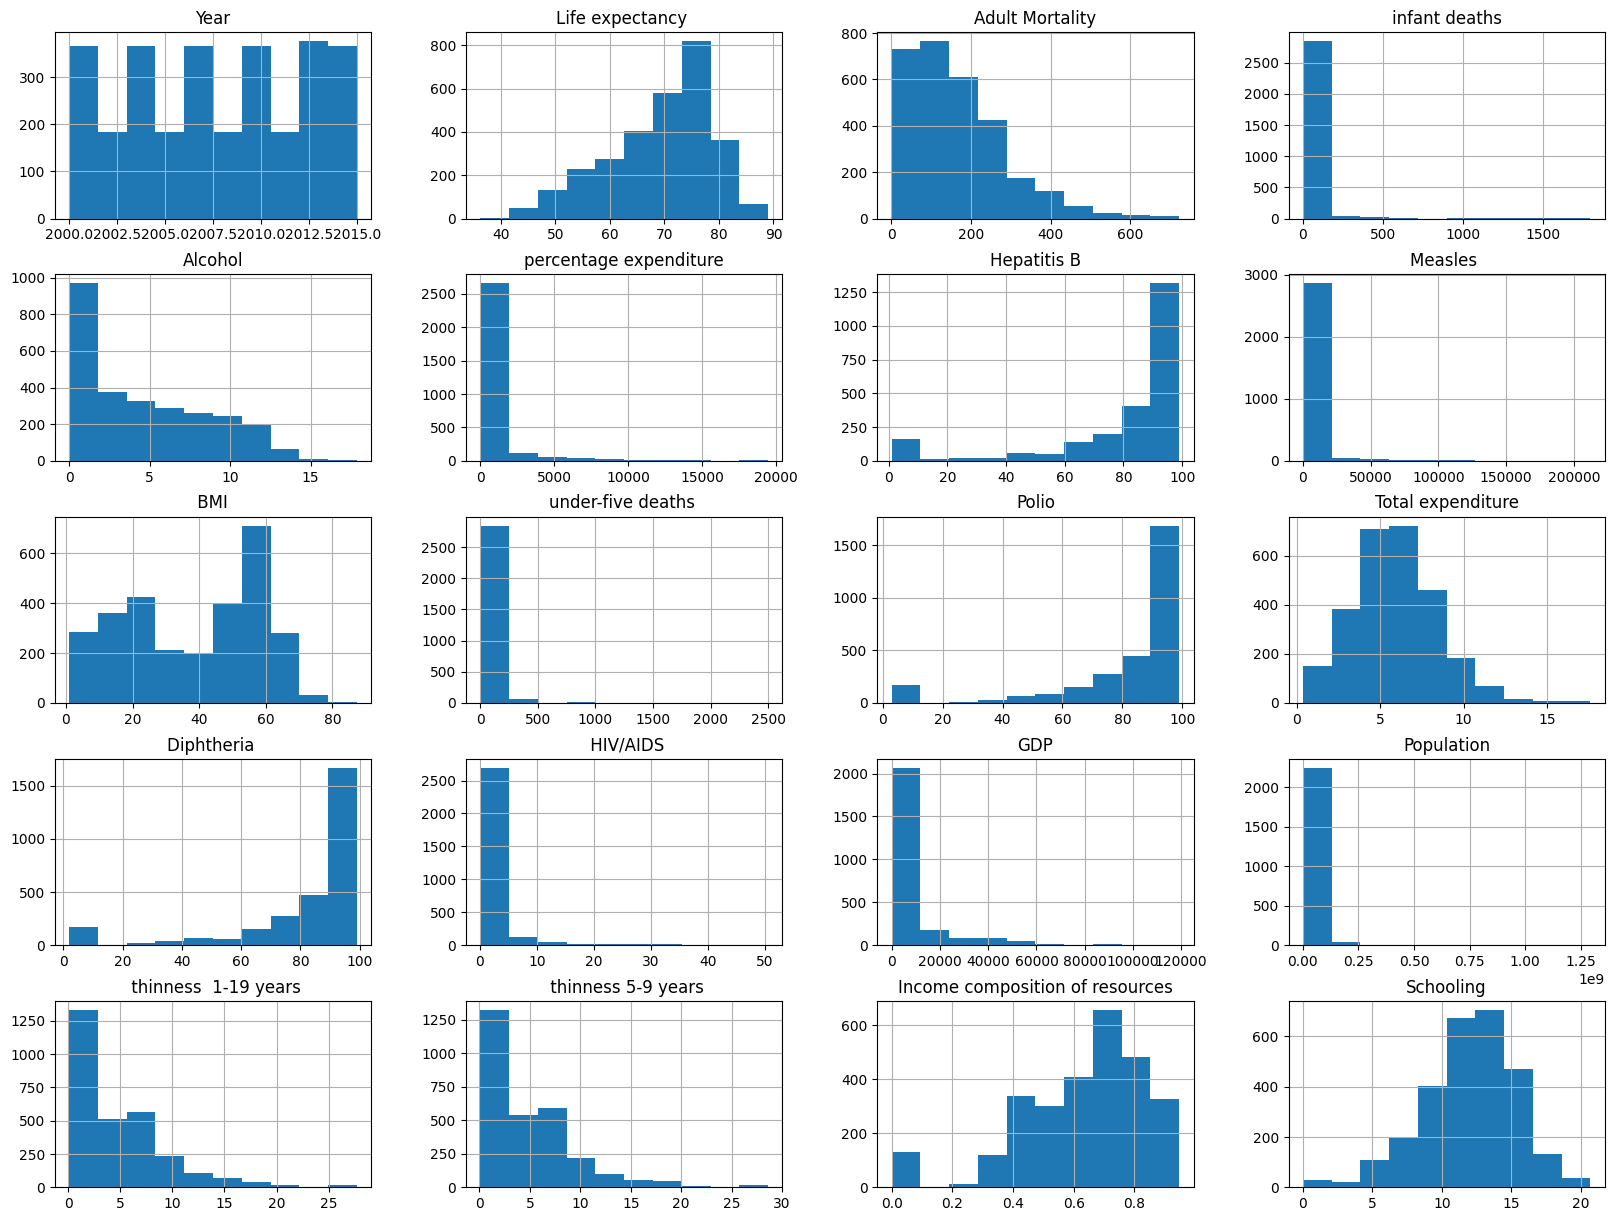

In [302]:
df.hist(figsize=(20,15));

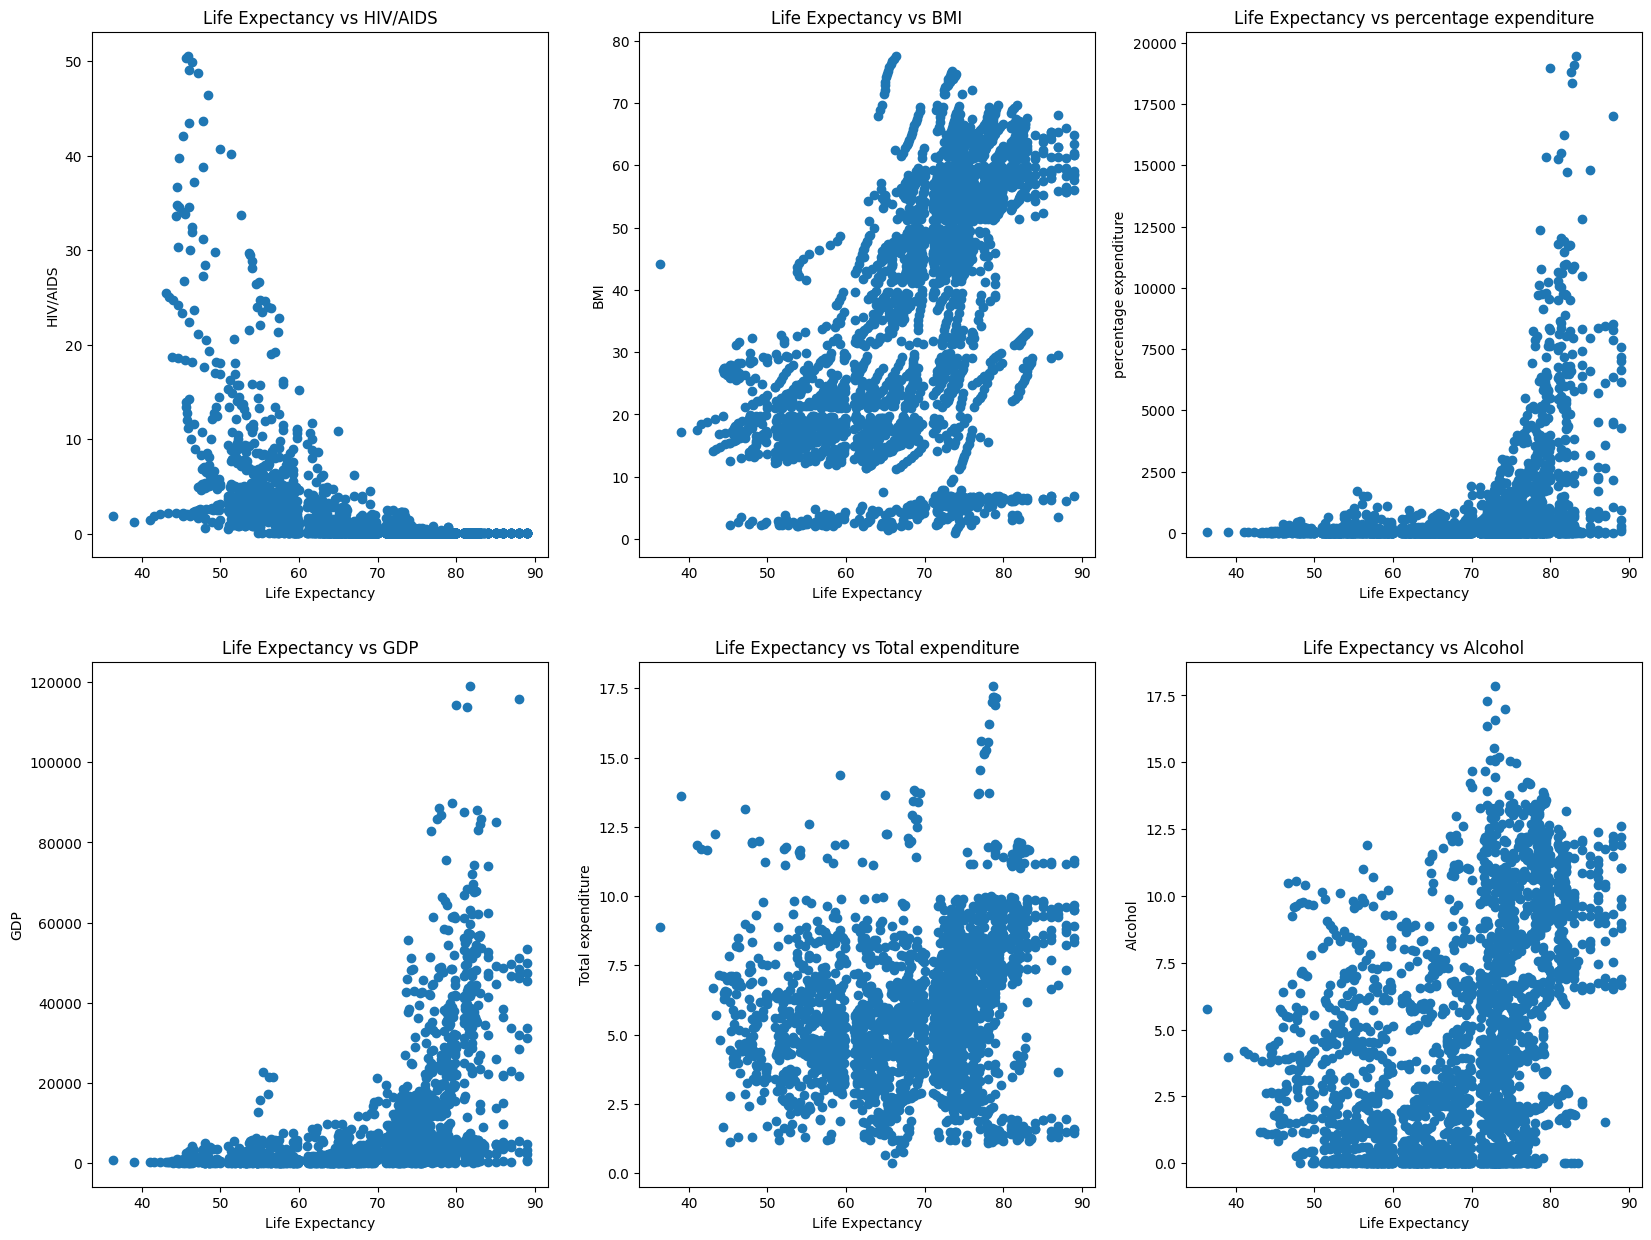

In [303]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
plt.scatter(df['Life expectancy '],df[' HIV/AIDS'])
plt.xlabel('Life Expectancy')
plt.ylabel('HIV/AIDS')
plt.title('Life Expectancy vs HIV/AIDS');

plt.subplot(2,3,2)
plt.scatter(df['Life expectancy '],df[' BMI '])
plt.xlabel('Life Expectancy')
plt.ylabel('BMI')
plt.title('Life Expectancy vs BMI');

plt.subplot(2,3,3)
plt.scatter(df['Life expectancy '],df['percentage expenditure'])
plt.xlabel('Life Expectancy')
plt.ylabel('percentage expenditure')
plt.title('Life Expectancy vs percentage expenditure');

plt.subplot(2,3,4)
plt.scatter(df['Life expectancy '],df['GDP'])
plt.xlabel('Life Expectancy')
plt.ylabel('GDP')
plt.title('Life Expectancy vs GDP');

plt.subplot(2,3,5)
plt.scatter(df['Life expectancy '],df['Total expenditure'])
plt.xlabel('Life Expectancy')
plt.ylabel('Total expenditure')
plt.title('Life Expectancy vs Total expenditure');

plt.subplot(2,3,6)
plt.scatter(df['Life expectancy '],df['Alcohol'])
plt.xlabel('Life Expectancy')
plt.ylabel('Alcohol')
plt.title('Life Expectancy vs Alcohol');


In [304]:
mean_life_expectancy = df.groupby('Status')['Life expectancy '].mean()
mean_life_expectancy


Status
Developed     79.197852
Developing    67.111465
Name: Life expectancy , dtype: float64

/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

Text(0, 0.5, 'Life Expectancy')

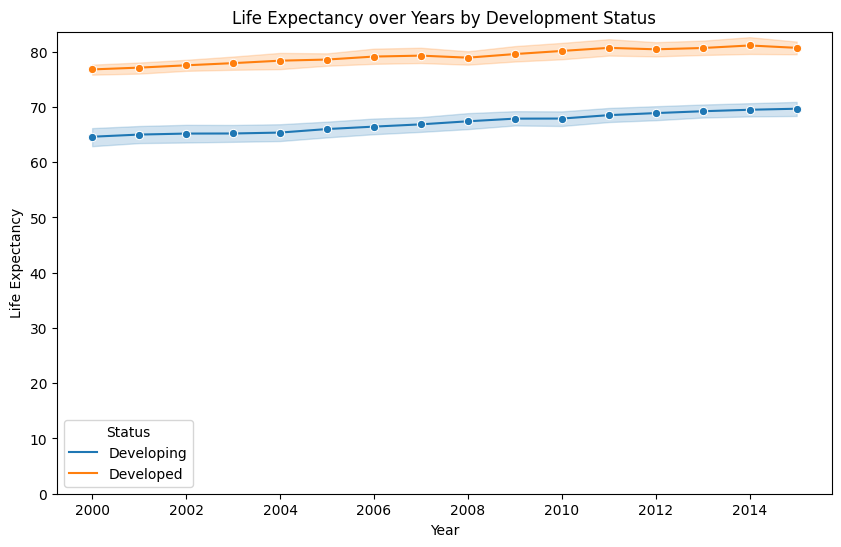

In [305]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Life expectancy ', hue='Status', marker='o').set_ylim(bottom=0)

plt.title('Life Expectancy over Years by Development Status')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')



In [306]:
df.select_dtypes(exclude='object').corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


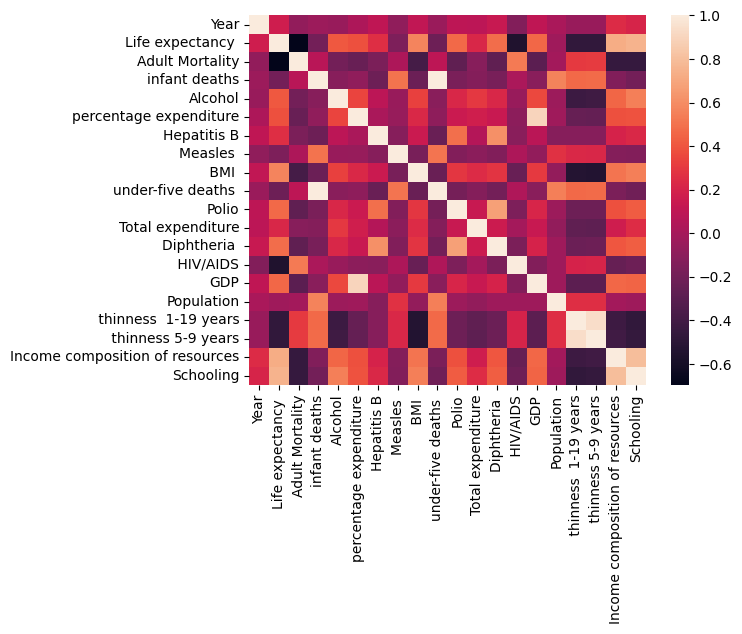

In [307]:
sns.heatmap(df.select_dtypes(exclude=['object']).corr());


In [308]:
cols_to_dummy=train_set.select_dtypes(include='object').columns
train_set_dummy=pd.get_dummies(train_set,columns=cols_to_dummy,drop_first=True,dtype='int')
train_set_dummy.shape

(2351, 20)

In [309]:
imputer = KNNImputer(n_neighbors=15, metric='nan_euclidean')


In [310]:
imputed_data = imputer.fit_transform(train_set_dummy.select_dtypes(exclude='object'))
imputed_data=pd.DataFrame(imputed_data,columns=train_set_dummy.columns)
imputed_data.isna().sum()

Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Status_Developing                  0
dtype: int64

In [311]:
#cols_to_drop = [col for col in imputed_data.columns if col.startswith('Country')]

#imputed_data.drop('Year', axis=1, inplace=True)

imputed_data.shape

(2351, 20)

In [312]:
imputed_data.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Status_Developing'],
      dtype='object')

In [313]:
imputed_data.isna().sum()

Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Status_Developing                  0
dtype: int64

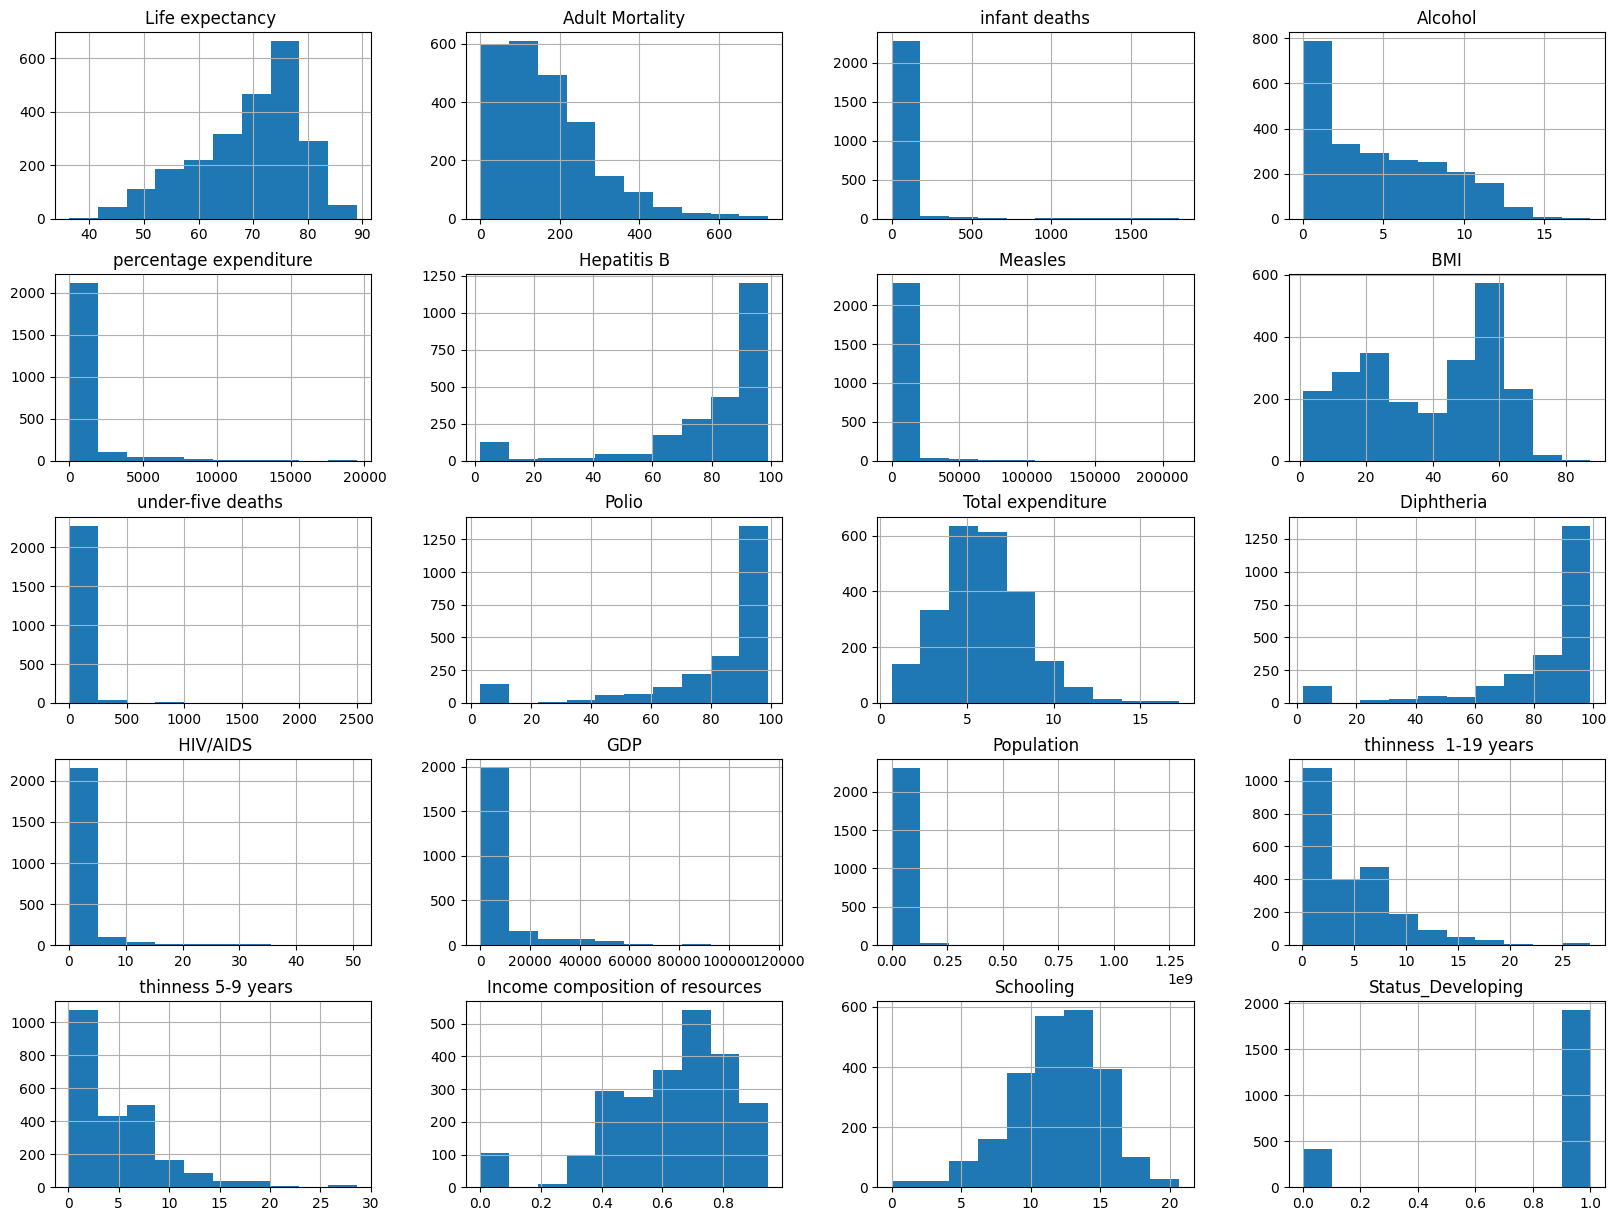

In [314]:
imputed_data.hist(figsize=(20,15));

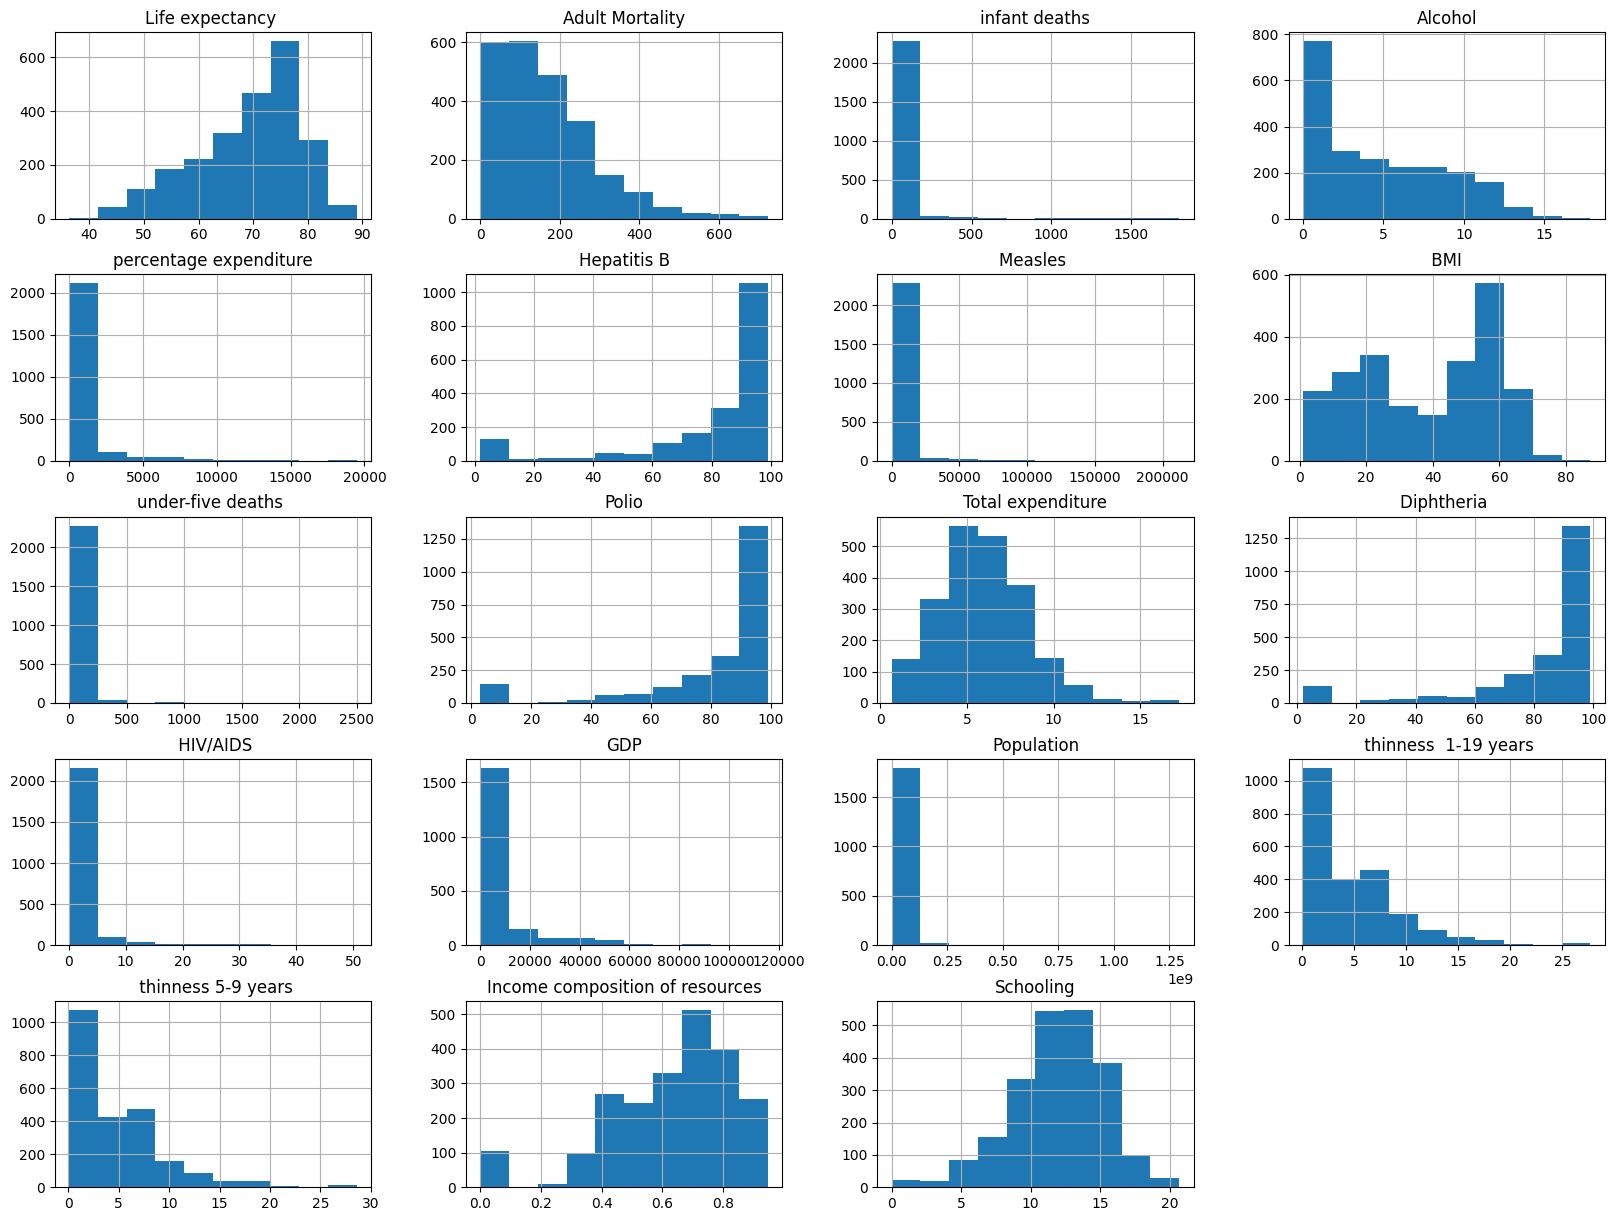

In [315]:
train_set.hist(figsize=(20,15));

In [316]:
isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(imputed_data)
outlier_pred


array([1, 1, 1, ..., 1, 1, 1])

In [317]:
print("Number of outliers:", len(imputed_data[outlier_pred == -1]))
print("Number of rows without outliers:", len(imputed_data[outlier_pred == 1]))
imputed_data = imputed_data.iloc[outlier_pred == 1]

print("New shape:", imputed_data.shape)
imputed_data.shape  


Number of outliers: 164
Number of rows without outliers: 2187
New shape: (2187, 20)


(2187, 20)

In [318]:
cat_col=imputed_data['Status_Developing']
cat_col

0       1.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
2345    1.0
2347    1.0
2348    1.0
2349    1.0
2350    1.0
Name: Status_Developing, Length: 2187, dtype: float64

In [319]:
num_col=imputed_data.drop('Status_Developing',axis=1)

In [320]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(num_col)
scaled_data=pd.DataFrame(scaled_data,columns=num_col.columns)

cat_col_reset = cat_col.reset_index(drop=True)
scaled_data['Status_Developing'] = cat_col_reset


In [321]:
train_set = train_set.dropna(subset=['Life expectancy '])


life_expectancy = train_set['Life expectancy ']  
train_set_features = train_set.drop('Life expectancy ', axis=1)

In [322]:
train_set_features

,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2113,Developing,248.0,1,10.78,0.000000,99.0,6,48.3,1,99.0,9.15,98.0,0.1,NaN,NaN,3.1,3.3,NaN,NaN
1182,Developed,65.0,0,6.61,725.485316,NaN,0,55.9,0,97.0,1.70,97.0,0.1,3944.999000,289521.0,1.0,0.9,0.866,17.6
1410,Developing,166.0,3,NaN,0.000000,97.0,17779,44.9,3,97.0,NaN,97.0,0.1,NaN,NaN,3.3,3.4,0.662,13.0
2469,Developing,278.0,69,1.74,35.352647,NaN,4381,NaN,104,69.0,3.18,69.0,0.2,477.738478,29435944.0,NaN,NaN,0.409,5.6
2816,Developing,118.0,0,6.67,1871.736563,95.0,0,6.7,1,95.0,8.78,95.0,0.1,9415.173860,3362755.0,1.5,1.5,0.774,15.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719,Developing,362.0,79,10.03,116.202964,8.0,1313,16.3,119,79.0,11.20,8.0,8.0,594.997256,33915133.0,6.0,6.0,0.473,10.9
2898,Developing,24.0,38,0.05,0.000000,79.0,13,35.1,49,79.0,4.92,79.0,0.1,NaN,NaN,13.8,13.8,0.477,8.6
77,Developing,153.0,0,7.21,927.407585,99.0,0,39.5,0,93.0,4.41,98.0,0.1,9386.716452,NaN,3.6,3.5,0.000,0.0
1051,Developing,167.0,0,9.06,662.266369,91.0,0,41.1,0,91.0,5.99,91.0,0.1,6764.722867,NaN,3.9,3.9,0.000,15.1


In [323]:

# Let's first define our preprocessing steps for the categorical features.
# We're using OneHotEncoder here to convert categorical variables into a form that could be provided to ML algorithms.
categorical_features = train_set_features.select_dtypes(include='object').columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', dtype='int',handle_unknown='ignore'))
])

# Next, for the numerical features, we'll impute any missing values using KNNImputer and then scale them.
numerical_features = train_set_features.select_dtypes(exclude='object').columns
numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=15, metric='nan_euclidean'))

])

# Now let's combine these preprocessing steps into one ColumnTransformer. This allows us to apply different transformations to different columns.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# I'll now create the full pipeline, integrating the preprocessor with a RandomForestRegressor as our regression model.
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42, max_depth=5))
])

# We'll now fit the pipeline on our training set. This will apply all the preprocessing steps followed by training our regressor.
pipeline.fit(train_set_features, life_expectancy) 


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=15))]),
                                                  Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype='int',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['Status'], dtype='object'))])),
                ('regressor',
                 DecisionTreeRegressor(max_depth=5, random_state=42))])

In [324]:
categorical_features

Index(['Status'], dtype='object')

In [325]:

tree_rmses = -cross_val_score(pipeline, train_set_features, life_expectancy,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(tree_rmses).describe()


count    10.000000
mean      3.119251
std       0.202594
min       2.687809
25%       3.032274
50%       3.170097
75%       3.208540
max       3.373129
dtype: float64

In [326]:
pipeline.fit(train_set_features, life_expectancy)
predictions = pipeline.predict(train_set_features)
tree_rmse = mean_squared_error(life_expectancy, predictions,
                                 squared=False)
tree_rmse

2.763854603377438

In [327]:
decision_tree_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("decision_tree", DecisionTreeRegressor(random_state=42)),
])

# Define the parameter grid for the decision tree
param_grid = [
    {'decision_tree__max_depth': [3, 5, 7],
     'decision_tree__min_samples_split': [2, 10, 20],
     'decision_tree__min_samples_leaf': [10,30,40]}
]

# Create the grid search object
grid_search = GridSearchCV(decision_tree_pipeline, param_grid, cv=10,
                           scoring='neg_root_mean_squared_error')

# Fit the grid search to your data
grid_search.fit(train_set_features, life_expectancy) 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer(n_neighbors=15))]),
                                                                         Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' t...
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        dtype='int',
                                                                                                        handle_unknown='ignore'))]),
                                                                         Index(['Status'], dtype='object'))])),
                                       ('decision_tree',
                                        DecisionTreeRegressor(random_state=42))]),
             param_grid=[{'decision_tree__max_depth': [3, 5, 7],
                          'decision_tree__min_samples_leaf': [10, 30, 40],
                          'decision_tree__min_samples_split': [2, 10, 20]}],
             scoring='neg_root_mean_squared_error')

In [328]:
print (grid_search.best_params_)

print (grid_search.best_score_)

print (grid_search.best_estimator_)

final_model = grid_search.best_estimator_

{'decision_tree__max_depth': 7, 'decision_tree__min_samples_leaf': 10, 'decision_tree__min_samples_split': 2}
-2.6892475279465993
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=15))]),
                                                  Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                      

In [329]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head(10) 



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decision_tree__max_depth,param_decision_tree__min_samples_leaf,param_decision_tree__min_samples_split,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
20,0.591380,0.338617,0.083830,0.050287,7,10,20,"{'decision_tree__max_depth': 7, 'decision_tree...",-2.837996,-2.952622,...,-2.512149,-2.845474,-3.054267,-2.718957,-2.372375,-2.755210,-2.386332,-2.689248,0.230607,1
19,0.486061,0.085996,0.076590,0.037463,7,10,10,"{'decision_tree__max_depth': 7, 'decision_tree...",-2.837996,-2.952622,...,-2.512149,-2.845474,-3.054267,-2.718957,-2.372375,-2.755210,-2.386332,-2.689248,0.230607,1
18,0.527501,0.298058,0.061424,0.017199,7,10,2,"{'decision_tree__max_depth': 7, 'decision_tree...",-2.837996,-2.952622,...,-2.512149,-2.845474,-3.054267,-2.718957,-2.372375,-2.755210,-2.386332,-2.689248,0.230607,1
23,0.455523,0.108672,0.095180,0.115682,7,30,20,"{'decision_tree__max_depth': 7, 'decision_tree...",-2.858800,-3.385903,...,-2.606009,-3.027839,-3.447743,-2.926305,-2.827623,-3.000736,-2.568932,-2.950375,0.272586,4
22,0.655941,0.252705,0.094605,0.069333,7,30,10,"{'decision_tree__max_depth': 7, 'decision_tree...",-2.858800,-3.385903,...,-2.606009,-3.027839,-3.447743,-2.926305,-2.827623,-3.000736,-2.568932,-2.950375,0.272586,4
21,0.536132,0.213912,0.090408,0.057581,7,30,2,"{'decision_tree__max_depth': 7, 'decision_tree...",-2.858800,-3.385903,...,-2.606009,-3.027839,-3.447743,-2.926305,-2.827623,-3.000736,-2.568932,-2.950375,0.272586,4
26,0.492759,0.172730,0.060212,0.016081,7,40,20,"{'decision_tree__max_depth': 7, 'decision_tree...",-2.890335,-3.555041,...,-2.908060,-3.076066,-3.430211,-3.030860,-3.083984,-3.024722,-2.672241,-3.066969,0.243026,7
25,0.429435,0.088759,0.061620,0.007816,7,40,10,"{'decision_tree__max_depth': 7, 'decision_tree...",-2.890335,-3.555041,...,-2.908060,-3.076066,-3.430211,-3.030860,-3.083984,-3.024722,-2.672241,-3.066969,0.243026,7
24,0.396054,0.015697,0.057318,0.007120,7,40,2,"{'decision_tree__max_depth': 7, 'decision_tree...",-2.890335,-3.555041,...,-2.908060,-3.076066,-3.430211,-3.030860,-3.083984,-3.024722,-2.672241,-3.066969,0.243026,7
9,0.385845,0.029362,0.059035,0.008025,5,10,2,"{'decision_tree__max_depth': 5, 'decision_tree...",-3.257094,-3.475879,...,-2.998633,-3.169007,-3.327084,-3.168512,-3.116809,-3.178092,-2.679602,-3.131607,0.208399,10


In [331]:
test_set = test_set.dropna(subset=['Life expectancy '])

X_test = test_set.drop("Life expectancy ", axis=1)
y_test = test_set["Life expectancy "]

final_predictions = final_model.predict(test_set)


final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)



2.8555003494681106


In [349]:
names=train_set_features.columns.tolist()

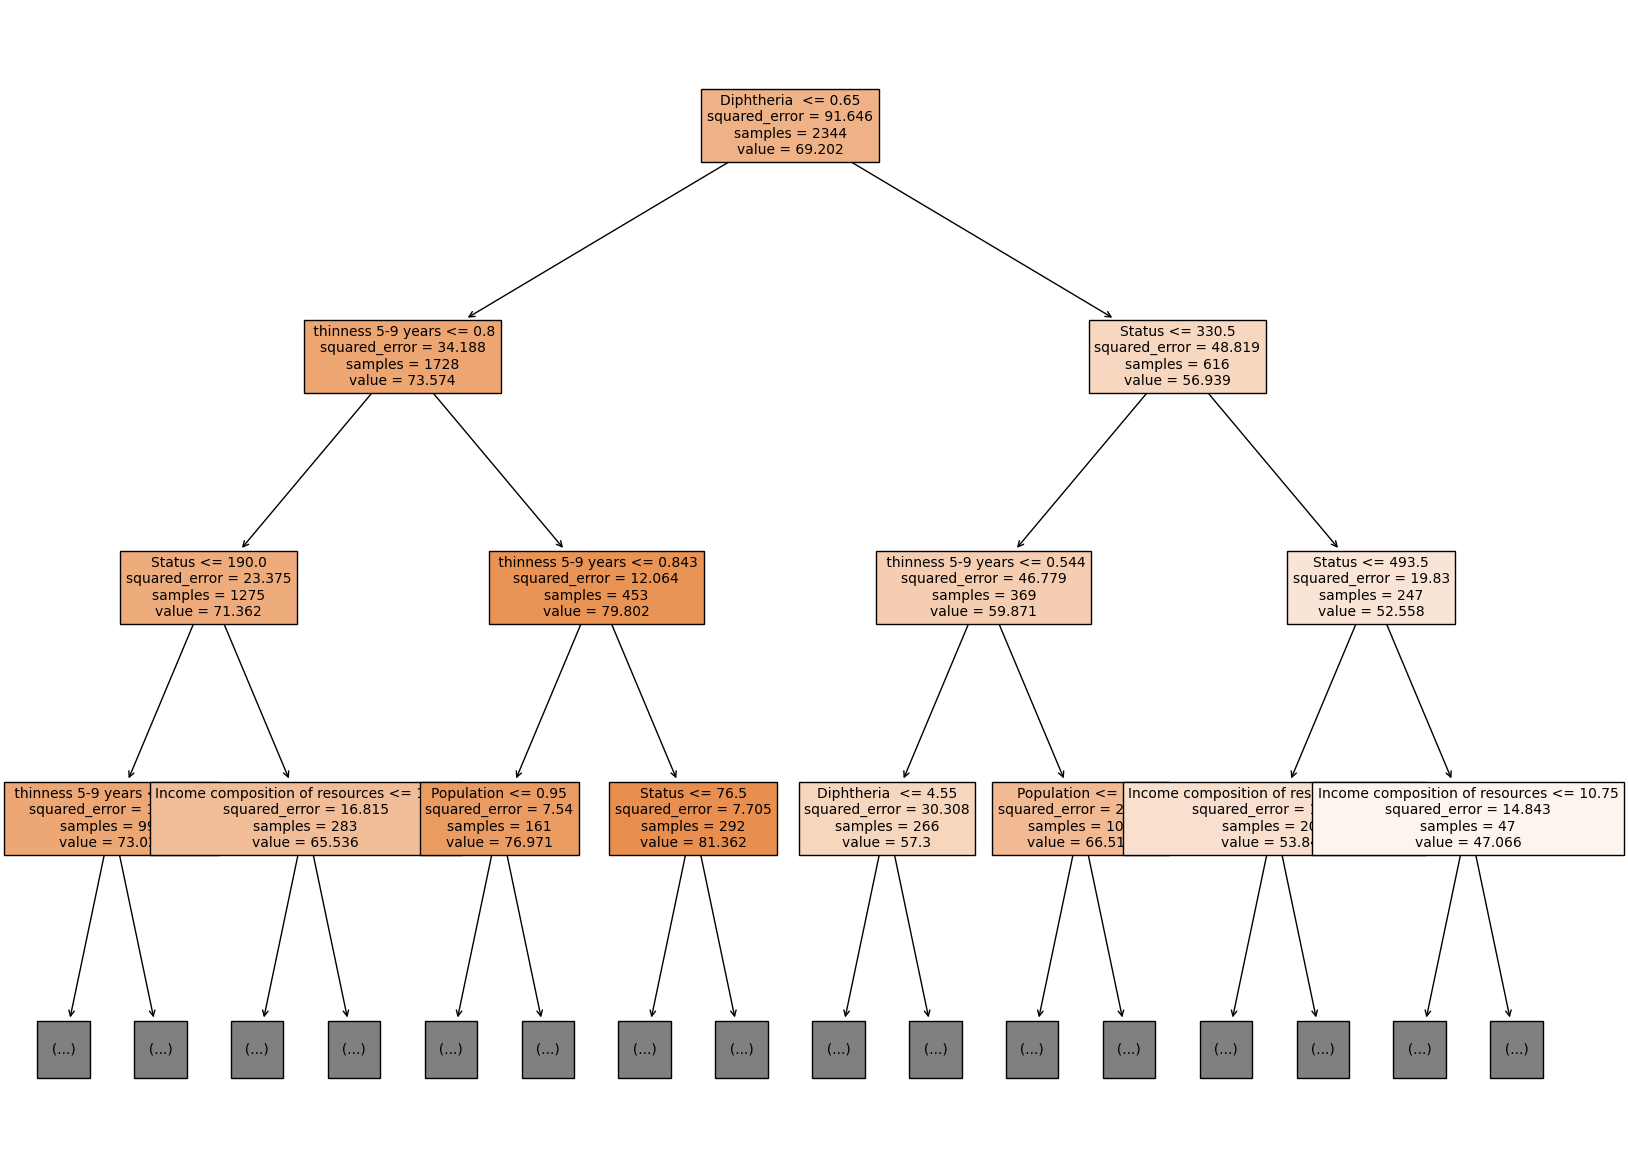

In [350]:
# Assuming your pipeline is named 'pipeline' and has already been fitted
decision_tree_model = final_model.named_steps['decision_tree']
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))

# Set the max_depth parameter. For example, to show the top 3 levels of the tree
top_levels = 3
plot_tree(decision_tree_model, filled=True, max_depth=top_levels, feature_names=names, fontsize=10)

plt.show()


In [353]:
feature_importances = final_model.named_steps['decision_tree'].feature_importances_
importance_df = pd.DataFrame({'Feature': train_set_features.columns, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(importance_df)


                            Feature  Importance
11                      Diphtheria     0.635830
16               thinness 5-9 years    0.177898
0                            Status    0.126528
17  Income composition of resources    0.017701
14                       Population    0.009995
2                     infant deaths    0.007433
15             thinness  1-19 years    0.004968
3                           Alcohol    0.004754
1                   Adult Mortality    0.004099
5                       Hepatitis B    0.002940
7                              BMI     0.002274
9                             Polio    0.001288
8                under-five deaths     0.001166
4            percentage expenditure    0.000790
6                          Measles     0.000715
10                Total expenditure    0.000581
18                        Schooling    0.000580
13                              GDP    0.000461
12                         HIV/AIDS    0.000000


In [352]:

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"{indent}if {name} <= {threshold:.2f}:")
            recurse(tree_.children_left[node], depth + 1)
            print(f"{indent}else:  # if {name} > {threshold:.2f}")
            recurse(tree_.children_right[node], depth + 1)
        else:
            print(f"{indent}return {tree_.value[node]}")

    recurse(0, 1)

tree_to_code(decision_tree_model, train_set_features.columns)


  if Diphtheria  <= 0.65:
    if  thinness 5-9 years <= 0.80:
      if Status <= 190.00:
        if  thinness 5-9 years <= 0.65:
          if infant deaths <= 7.94:
            if Alcohol <= 93.16:
              if Income composition of resources <= 8.05:
                return [[64.06190476]]
              else:  # if Income composition of resources > 8.05
                return [[69.38150289]]
            else:  # if Alcohol > 93.16
              if  thinness  1-19 years <= 1.45:
                return [[70.1]]
              else:  # if  thinness  1-19 years > 1.45
                return [[72.8630137]]
          else:  # if infant deaths > 7.94
            if  thinness  1-19 years <= 1.05:
              return [[79.925]]
            else:  # if  thinness  1-19 years > 1.05
              return [[73.86842105]]
        else:  # if  thinness 5-9 years > 0.65
          if Status <= 131.50:
            if  thinness  1-19 years <= 2.05:
              if Alcohol <= 1.65:
                ret